In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn_image as isns

In [2]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [3]:
data_baseline = xr.open_mfdataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/FCO2/FCO2_Baseline_2.6_cropped.nc')

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [4]:
data_oae = xr.open_mfdataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/FCO2/FCO2_OAE_2.6_cropped.nc')

### Data Point Average of FCO2 

In [5]:
data_baseline = data_baseline.where(data_baseline)
data_oae = data_oae.where(data_oae)

In [6]:
sliced_data_baseline = data_baseline.where((3 < data_baseline.nav_lon) & (data_baseline.nav_lon < 4) & (52 < data_baseline.nav_lat) & (data_baseline.nav_lat < 53), drop=True)
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [7]:
sliced_data_oae = data_oae.where((3 < data_oae.nav_lon) & (data_oae.nav_lon < 4) & (52 < data_oae.nav_lat) & (data_oae.nav_lat < 53), drop=True)
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

In [8]:
sliced_data_baseline_plot = sliced_data_baseline.fco2.mean(dim=('y', 'x'))
sliced_data_oae_plot = sliced_data_oae.fco2.mean(dim=('y', 'x'))

In [9]:
sliced_data_baseline_plot = sliced_data_baseline_plot.to_dataset()
sliced_data_oae_plot = sliced_data_oae_plot.to_dataset()

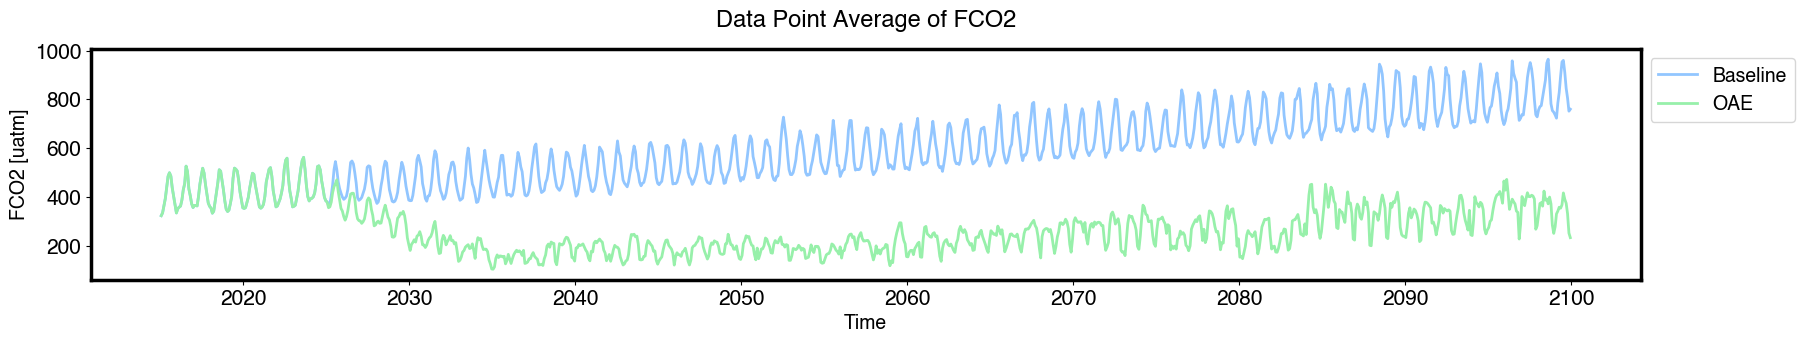

In [10]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_data_baseline_plot.time_counter, sliced_data_baseline_plot.fco2, linewidth=2, label = 'Baseline')
plt.plot(sliced_data_oae_plot.time_counter, sliced_data_oae_plot.fco2, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("FCO2 [uatm]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('Data Point Average of FCO2', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [11]:
sliced_frame_baseline_plot = sliced_frame_baseline.fco2.mean(dim=('y', 'x'))
sliced_frame_oae_plot = sliced_frame_oae.fco2.mean(dim=('y', 'x'))

In [12]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

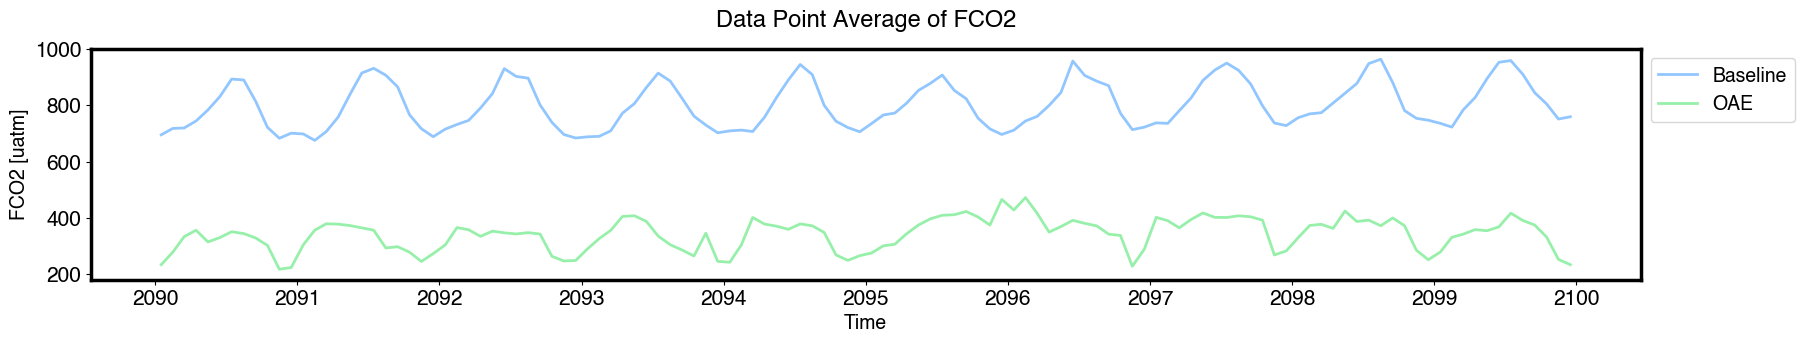

In [13]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.fco2, linewidth=2, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.fco2, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("FCO2 [uatm]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('Data Point Average of FCO2', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### Unweighted Data Point Seasonal Average of FCO2

In [14]:
start_date = "2090-01-01"
end_date = "2100-01-01"

fco2_baseline = sliced_data_baseline["fco2"].sel(time_counter=slice(start_date, end_date))

In [15]:
fco2_season_summary_baseline = fco2_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
fco2_season_mean_all_years_baseline = fco2_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)
fco2_seasonal_mean_baseline = fco2_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

In [16]:
start_date = "2090-01-01"
end_date = "2100-01-01"

fco2_oae = sliced_data_oae["fco2"].sel(time_counter=slice(start_date, end_date))

In [17]:
fco2_season_summary_oae = fco2_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
fco2_season_mean_all_years_oae = fco2_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)
fco2_seasonal_mean_oae = fco2_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

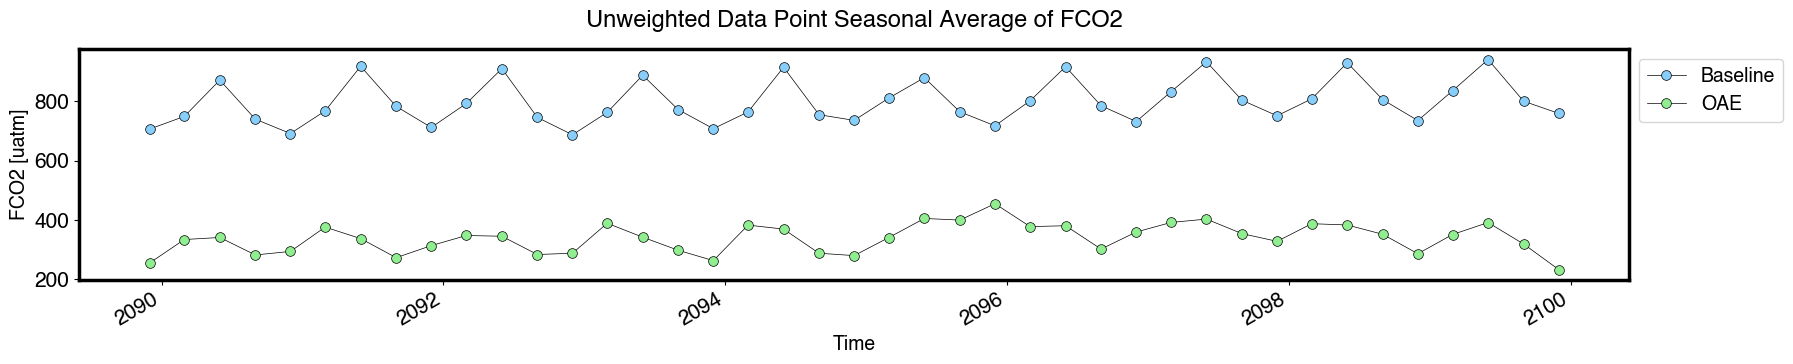

In [18]:
f, ax = plt.subplots(figsize=(20, 3))

fco2_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

fco2_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted Data Point Seasonal Average of FCO2", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("FCO2 [uatm]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted Data Point Seasonal Average of FCO2

In [19]:
month_length_baseline = fco2_baseline.time_counter.dt.days_in_month
fco2_weighted_mean_baseline = ((fco2_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
fco2_weighted_mean_baseline = fco2_weighted_mean_baseline.where(fco2_weighted_mean_baseline)
fco2_weighted_season_baseline = fco2_weighted_mean_baseline.groupby('time_counter').mean(["y", "x"])

In [20]:
month_length_oae = fco2_oae.time_counter.dt.days_in_month
fco2_weighted_mean_oae = ((fco2_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
fco2_weighted_mean_oae = fco2_weighted_mean_oae.where(fco2_weighted_mean_oae)
fco2_weighted_season_oae = fco2_weighted_mean_oae.groupby('time_counter').mean(["y", "x"])

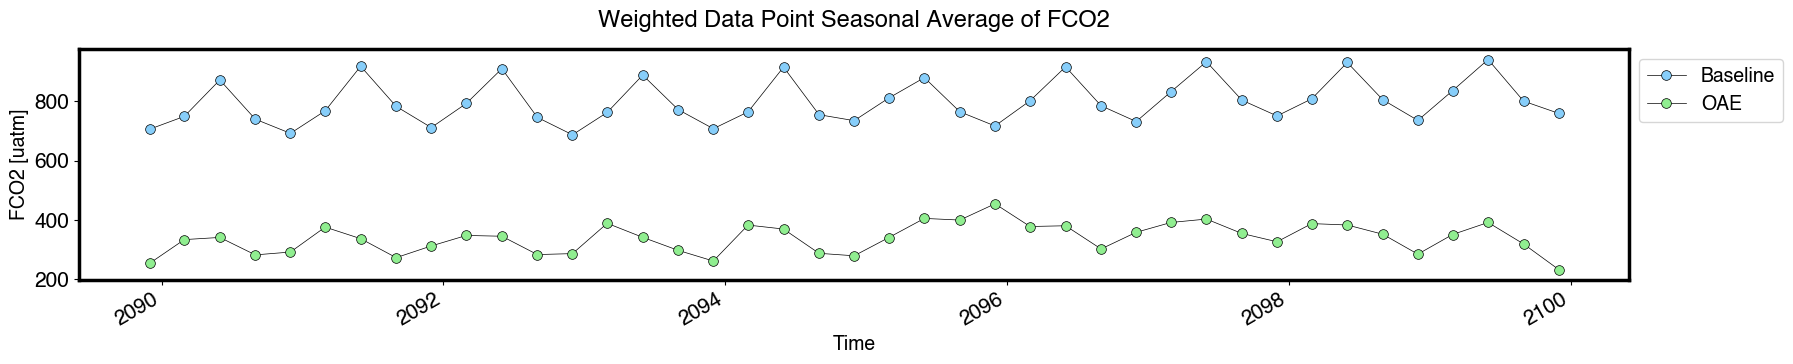

In [21]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
fco2_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

fco2_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted Data Point Seasonal Average of FCO2", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("FCO2 [uatm]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted Data Point Seasonal Average of FCO2 (seasons displayed)

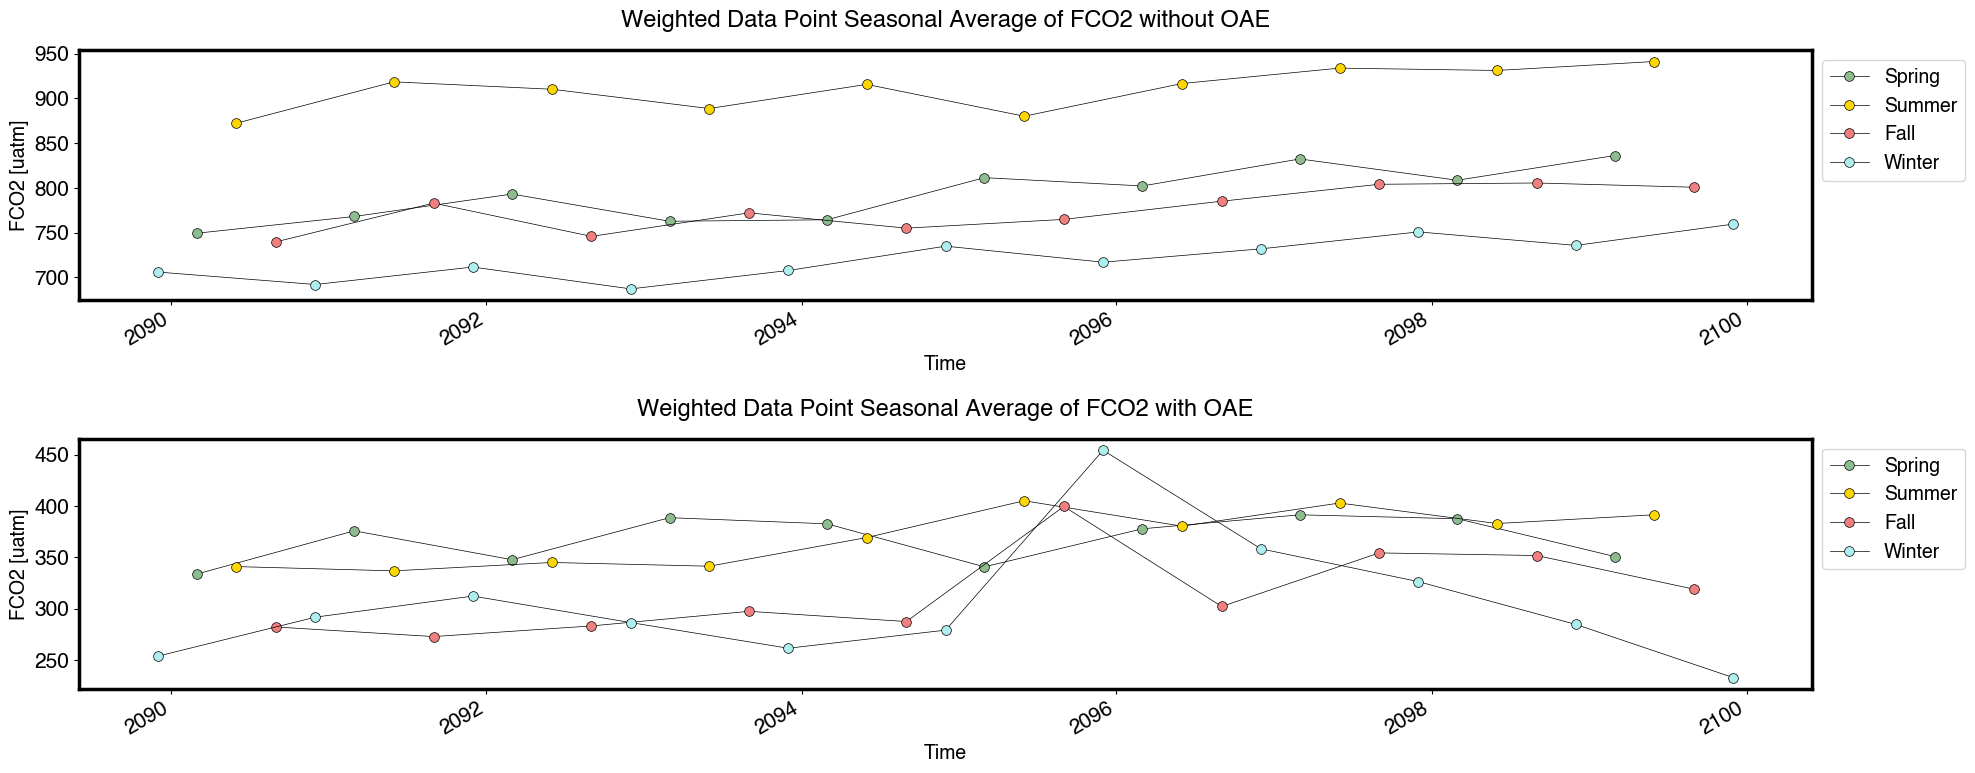

In [22]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in fco2_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted Data Point Seasonal Average of FCO2 without OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('FCO2 [uatm]', fontsize=14)

for month, arr in fco2_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted Data Point Seasonal Average of FCO2 with OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('FCO2 [uatm]', fontsize=14)
f.tight_layout()
plt.show()

### Weighted Data Point Seasonal Average of FCO2 without OAE (seasons displayed)

In [23]:
fco2_weighted_baseline = fco2_weighted_season_baseline.to_dataframe('fco2')
fco2_weighted_baseline['Month'] = pd.DatetimeIndex(fco2_weighted_baseline.index).month

In [24]:
conditions = [
    (fco2_weighted_baseline['Month'] == 3),
    (fco2_weighted_baseline['Month'] == 6),
    (fco2_weighted_baseline['Month'] == 9),
    (fco2_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

fco2_weighted_baseline['Month'] = np.select(conditions, values)

In [25]:
colors = dict(zip(fco2_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

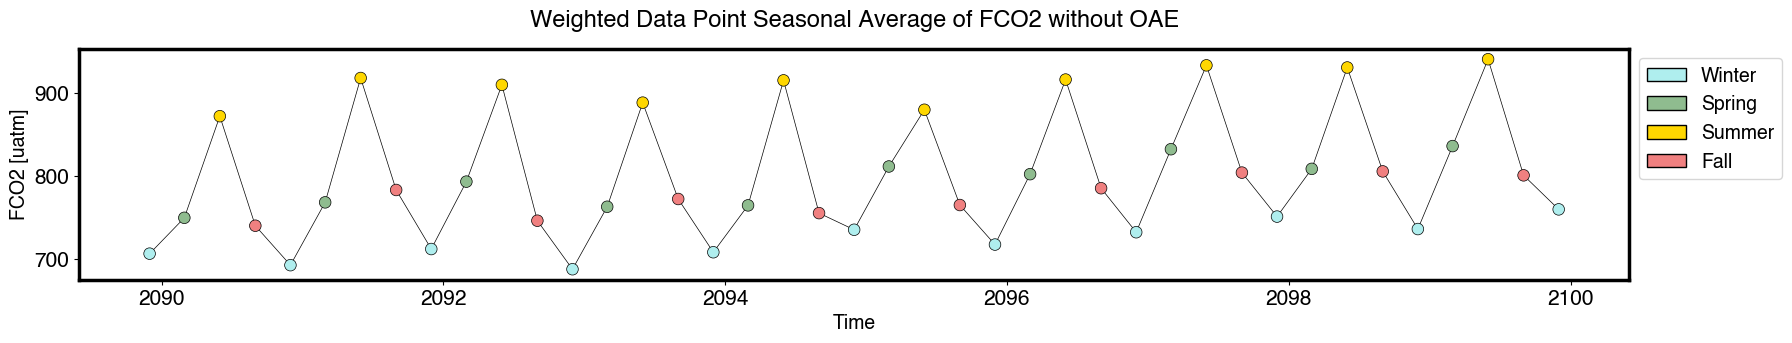

In [26]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(fco2_weighted_baseline.index, fco2_weighted_baseline.fco2, '-', color="black",  linewidth=0.5, markeredgewidth=0.5, zorder=1)
ax.scatter(fco2_weighted_baseline.index, fco2_weighted_baseline.fco2, color=fco2_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2 [uatm]', fontsize=14)
ax.set_title("Weighted Data Point Seasonal Average of FCO2 without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted Data Point Seasonal Average of FCO2 with OAE (seasons displayed)

In [27]:
fco2_weighted_oae = fco2_weighted_season_oae.to_dataframe('fco2')
fco2_weighted_oae['Month'] = pd.DatetimeIndex(fco2_weighted_oae.index).month

In [28]:
conditions = [
    (fco2_weighted_oae['Month'] == 3),
    (fco2_weighted_oae['Month'] == 6),
    (fco2_weighted_oae['Month'] == 9),
    (fco2_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

fco2_weighted_oae['Month'] = np.select(conditions, values)

In [29]:
colors = dict(zip(fco2_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

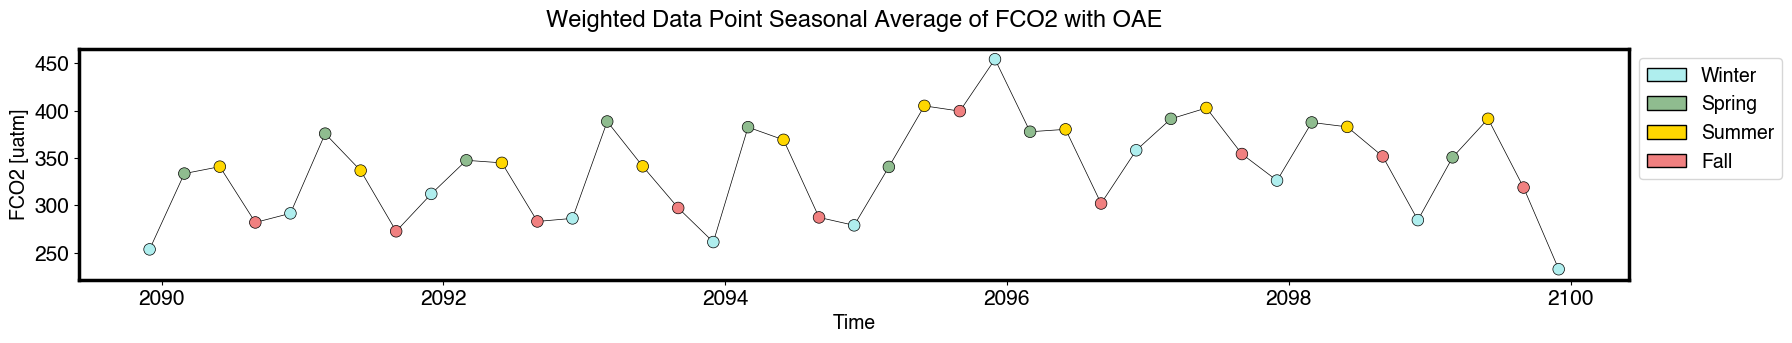

In [30]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(fco2_weighted_oae.index, fco2_weighted_oae.fco2, '-', color="black",  linewidth=0.5, zorder=1)
ax.scatter(fco2_weighted_oae.index, fco2_weighted_oae.fco2, color=fco2_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2 [uatm]', fontsize=14)
ax.set_title("Weighted Data Point Seasonal Average of FCO2 with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted Data Point Seasonal Average of FCO2 (seasons displayed)

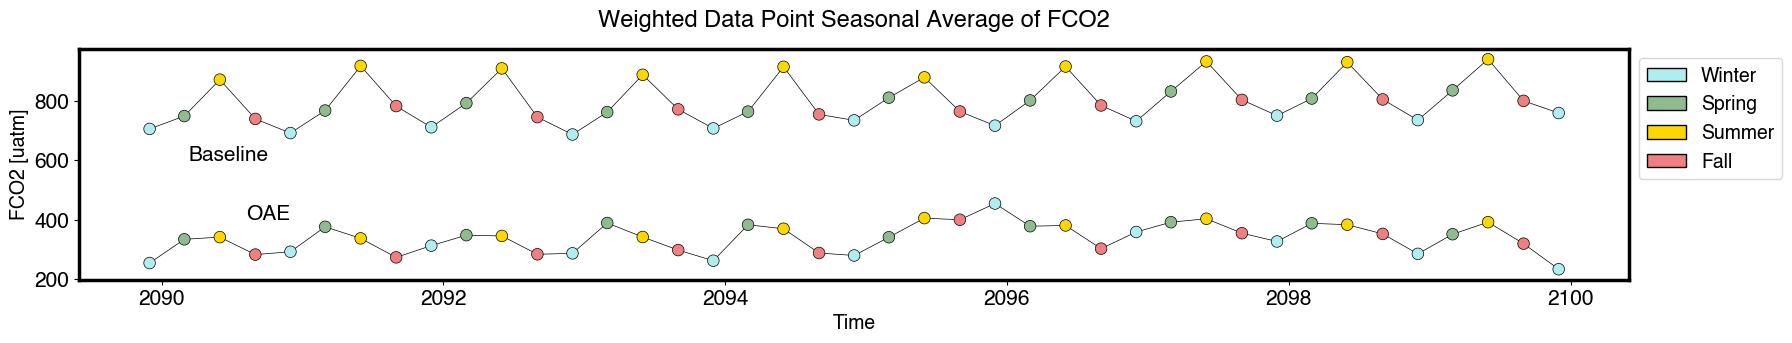

In [31]:
colors = dict(zip(fco2_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))
colors = dict(zip(fco2_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(fco2_weighted_baseline.index, fco2_weighted_baseline.fco2, '-', color="black",  linewidth=0.5, zorder=1)
ax.text(43900, 600, s='Baseline')
ax.scatter(fco2_weighted_baseline.index, fco2_weighted_baseline.fco2, color=fco2_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black',  linewidth=0.5, s=70)

ax.plot_date(fco2_weighted_oae.index, fco2_weighted_oae.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax.text(44050, 400, s='OAE')
ax.scatter(fco2_weighted_oae.index, fco2_weighted_oae.fco2, color=fco2_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2 [uatm]', fontsize=14)
ax.set_title("Weighted Data Point Seasonal Average of FCO2", fontname="Helvetica", fontsize=17, y=1.06)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/FCO2/figs/DPFCO2_seasonal_mean.png')

pass

### Data Point Monthly Average of FCO2

In [32]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

fco2_baseline_month = sliced_data_baseline["fco2"].sel(time_counter=slice(start_date_month, end_date_month))
fco2_monthly_mean_baseline = fco2_baseline_month.groupby('time_counter').mean(["y", "x"])

In [33]:
fco2_oae_month = sliced_data_oae["fco2"].sel(time_counter=slice(start_date_month, end_date_month))
fco2_monthly_mean_oae = fco2_oae_month.groupby('time_counter').mean(["y", "x"])

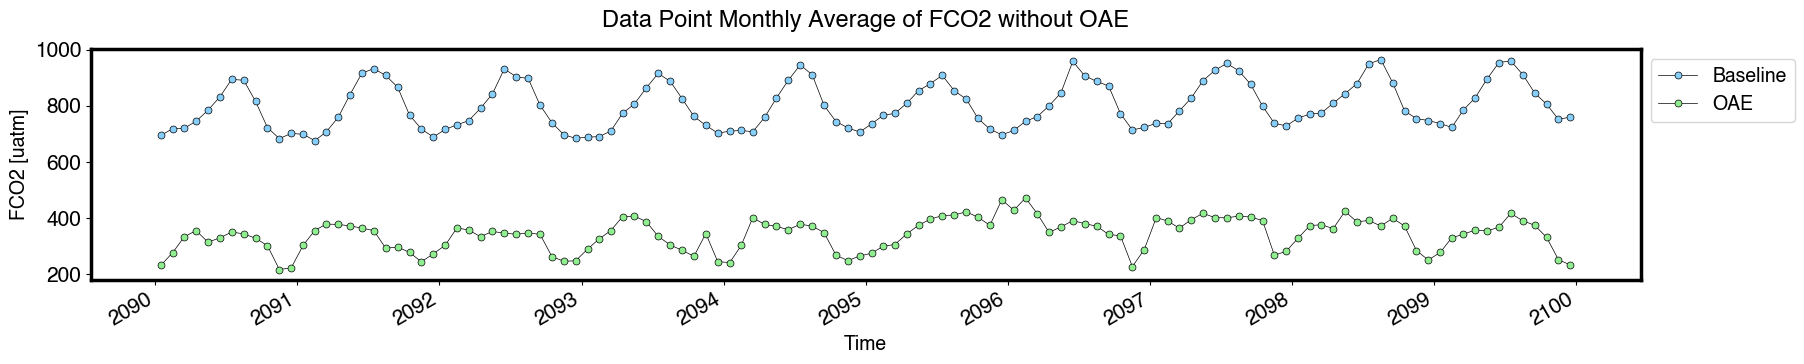

In [34]:
f, ax = plt.subplots(figsize=(20, 3))

fco2_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

fco2_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Data Point Monthly Average of FCO2 without OAE", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("FCO2 [uatm]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Data Point Monthly Average of FCO2 without OAE (months displayed)

In [35]:
fco2_baseline_monthly = fco2_monthly_mean_baseline.to_dataframe('fco2')
fco2_baseline_monthly['Month'] = pd.DatetimeIndex(fco2_baseline_monthly.index).month

In [36]:
conditions = [
    (fco2_baseline_monthly['Month'] == 1),
    (fco2_baseline_monthly['Month'] == 2),
    (fco2_baseline_monthly['Month'] == 3),
    (fco2_baseline_monthly['Month'] == 4),
    (fco2_baseline_monthly['Month'] == 5),
    (fco2_baseline_monthly['Month'] == 6),
    (fco2_baseline_monthly['Month'] == 7),
    (fco2_baseline_monthly['Month'] == 8),
    (fco2_baseline_monthly['Month'] == 9),
    (fco2_baseline_monthly['Month'] == 10),
    (fco2_baseline_monthly['Month'] == 11),
    (fco2_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

fco2_baseline_monthly['Month'] = np.select(conditions, values)

In [37]:
colors = dict(zip(fco2_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

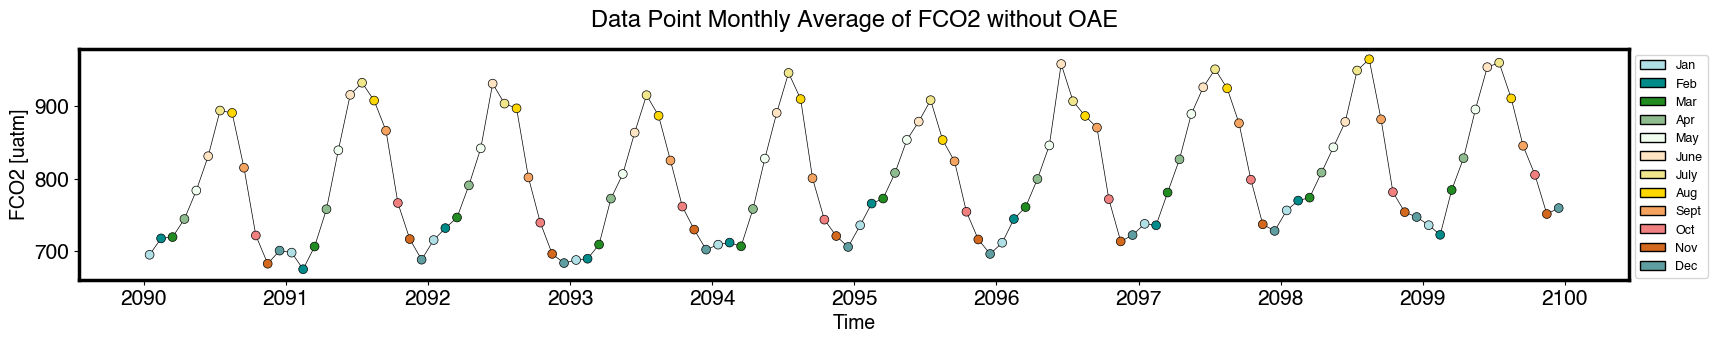

In [38]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(fco2_baseline_monthly.index, fco2_baseline_monthly.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(fco2_baseline_monthly.index, fco2_baseline_monthly.fco2, color=fco2_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2 [uatm]', fontsize=14)
ax.set_title("Data Point Monthly Average of FCO2 without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Data Point Monthly Average of FCO2 with OAE (months displayed)

In [39]:
fco2_oae_monthly = fco2_monthly_mean_oae.to_dataframe('fco2')
fco2_oae_monthly['Month'] = pd.DatetimeIndex(fco2_oae_monthly.index).month

In [40]:
conditions = [
    (fco2_oae_monthly['Month'] == 1),
    (fco2_oae_monthly['Month'] == 2),
    (fco2_oae_monthly['Month'] == 3),
    (fco2_oae_monthly['Month'] == 4),
    (fco2_oae_monthly['Month'] == 5),
    (fco2_oae_monthly['Month'] == 6),
    (fco2_oae_monthly['Month'] == 7),
    (fco2_oae_monthly['Month'] == 8),
    (fco2_oae_monthly['Month'] == 9),
    (fco2_oae_monthly['Month'] == 10),
    (fco2_oae_monthly['Month'] == 11),
    (fco2_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

fco2_oae_monthly['Month'] = np.select(conditions, values)

In [41]:
colors = dict(zip(fco2_oae_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

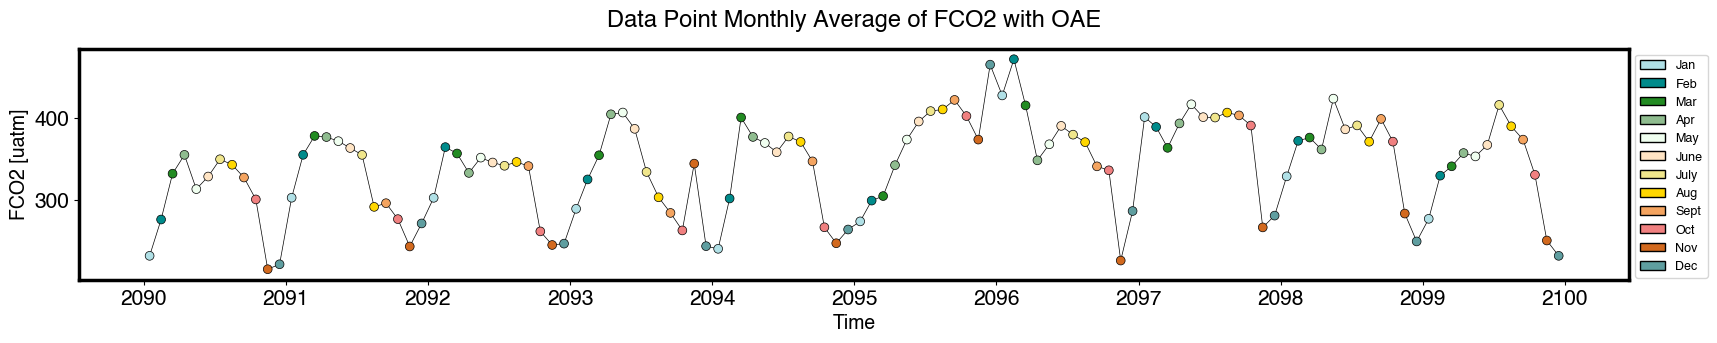

In [42]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(fco2_oae_monthly.index, fco2_oae_monthly.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(fco2_oae_monthly.index, fco2_oae_monthly.fco2, color=fco2_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2 [uatm]', fontsize=14)
ax.set_title("Data Point Monthly Average of FCO2 with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Data Point Monthly Average of FCO2 (months displayed)

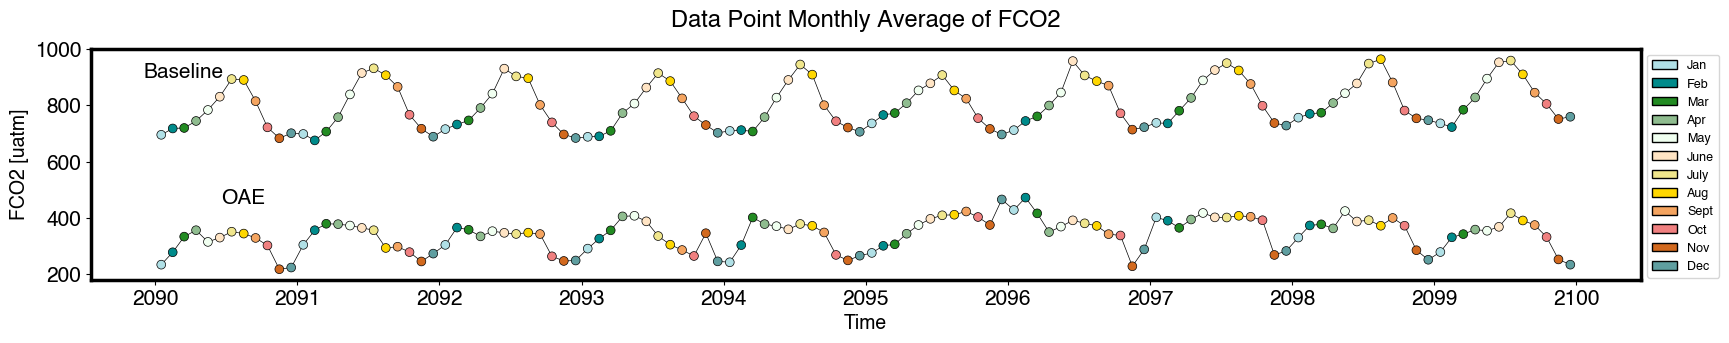

In [43]:
colors = dict(zip(fco2_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(fco2_baseline_monthly.index, fco2_baseline_monthly.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 900, s='Baseline')
ax.scatter(fco2_baseline_monthly.index, fco2_baseline_monthly.fco2, color=fco2_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(fco2_oae_monthly.index, fco2_oae_monthly.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax.text(44000, 450, s='OAE')
ax.scatter(fco2_oae_monthly.index, fco2_oae_monthly.fco2, color=fco2_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2 [uatm]', fontsize=14)
ax.set_title("Data Point Monthly Average of FCO2", fontsize=17, y=1.06)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/FCO2/figs/DPFCO2_monthly_mean.png')

pass

### Δ FCO2 between Baseline and OAE (months displayed)

In [44]:
delta_fco2 = fco2_baseline_monthly.fco2 - fco2_oae_monthly.fco2

In [45]:
delta_fco2 = delta_fco2.to_xarray()

In [46]:
delta_fco2 = delta_fco2.to_dataframe('fco2')
delta_fco2['Month'] = pd.DatetimeIndex(delta_fco2.index).month

In [47]:
conditions = [
    (delta_fco2['Month'] == 1),
    (delta_fco2['Month'] == 2),
    (delta_fco2['Month'] == 3),
    (delta_fco2['Month'] == 4),
    (delta_fco2['Month'] == 5),
    (delta_fco2['Month'] == 6),
    (delta_fco2['Month'] == 7),
    (delta_fco2['Month'] == 8),
    (delta_fco2['Month'] == 9),
    (delta_fco2['Month'] == 10),
    (delta_fco2['Month'] == 11),
    (delta_fco2['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_fco2['Month'] = np.select(conditions, values)

In [48]:
colors = dict(zip(delta_fco2.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

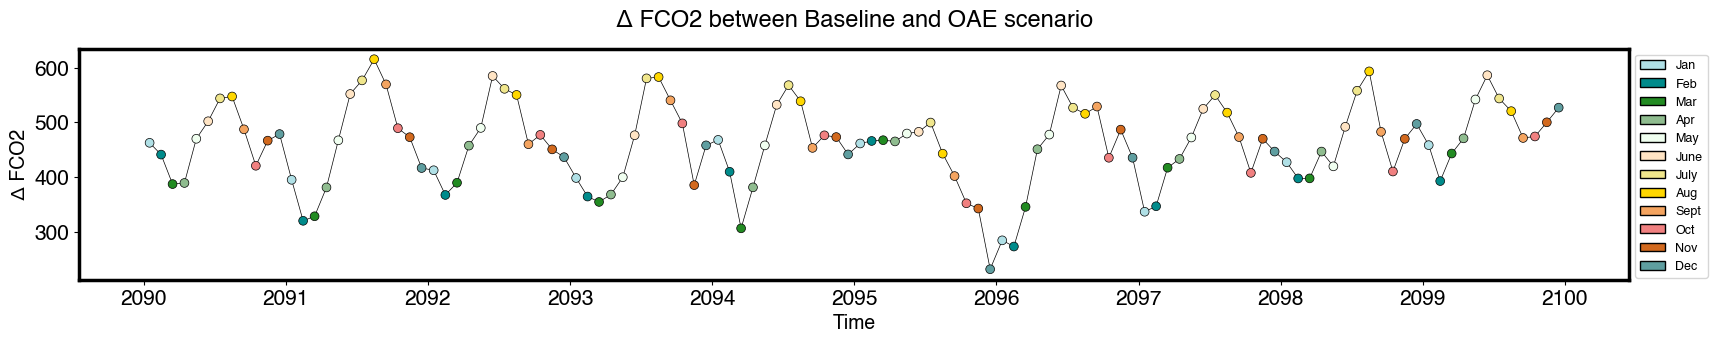

In [49]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_fco2.index, delta_fco2.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_fco2.index, delta_fco2.fco2, color=delta_fco2.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ FCO2', fontsize=14)
ax.set_title("Δ FCO2 between Baseline and OAE scenario", fontname="Helvetica", fontsize=17, y=1.06)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/FCO2/figs/DPFCO2_Δ_monthly_mean.png')

pass

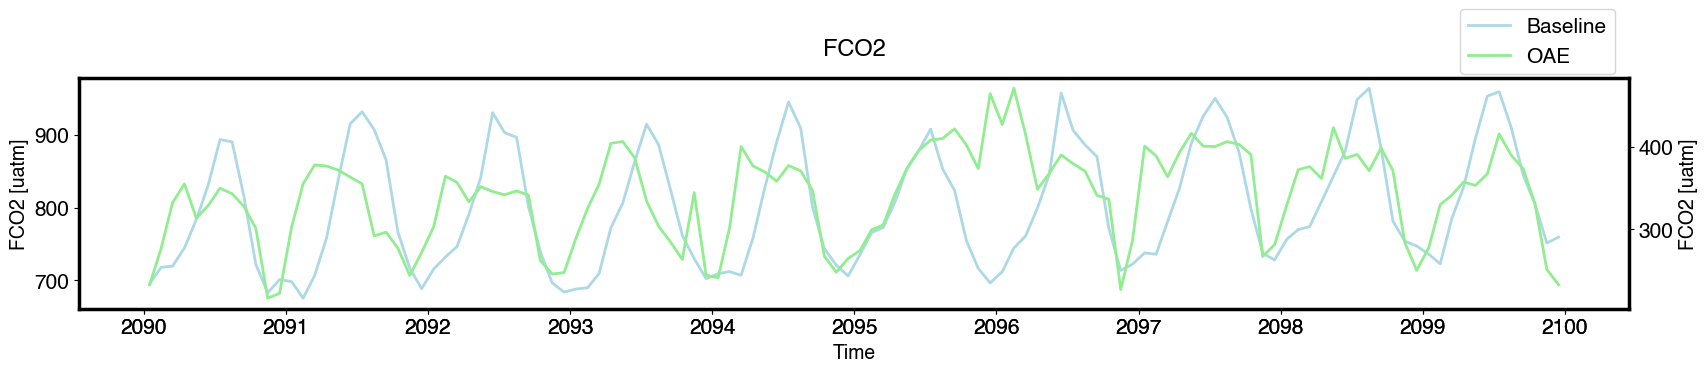

In [50]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(fco2_baseline_monthly.index, fco2_baseline_monthly.fco2, linewidth=2, color="lightblue", label = 'Baseline', zorder=1)
ax.set_ylabel('FCO2 [uatm]', fontsize=14)

ax2.plot(fco2_oae_monthly.index, fco2_oae_monthly.fco2, linewidth=2, color="lightgreen", label = 'OAE', zorder=1)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('FCO2 [uatm]', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('FCO2', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()